In [25]:
import sionna.rt as rt
import matplotlib.pyplot as plt
import numpy as np
import mitsuba as mi

scene = rt.load_scene(rt.scene.simple_reflector, merge_shapes=False)

In [26]:
# from 10m to 10km
# xs = np.logspace(1, 4, 1000, endpoint=True)
xs = np.logspace(1, 4, 1000, endpoint=True)

In [27]:
display_radius = np.diff(xs).min() / 10
scene = rt.load_scene(rt.scene.simple_reflector, merge_shapes=False)

tx = rt.Transmitter(name="tx", position=[0, 0, 10], display_radius=display_radius)
scene.add(tx)


for x in xs:
    rx = rt.Receiver(
        name=f"rx{x}", position=[float(x), float(np.cos(x / 2 / np.pi / xs.max())), 1.5],
        display_radius=0.1
    )
    scene.add(rx)

scene.tx_array = rt.PlanarArray(num_rows=1, num_cols=1, pattern="iso", polarization="V")
scene.rx_array = rt.PlanarArray(num_rows=1, num_cols=1, pattern="iso", polarization="V")

# default size is 1x1x0
scene.objects["reflector"].scaling = mi.Float(xs.max()*2)

p_solver = rt.PathSolver()
paths = p_solver(
    scene=scene,
    max_depth=5,
    los=True,
    specular_reflection=True,
    diffuse_reflection=False,
    refraction=True,
    synthetic_array=False,
    seed=2913,
)

fig = scene.preview(paths=paths, fov=135, resolution=(1000, 1000))

In [28]:
# Shape: [num_rx, num_rx_ant, num_tx, num_tx_ant, num_time_steps, num_subcarriers]
h_freq = paths.cfr(frequencies=[20e9],
                   normalize=False, # Normalize energy
                   normalize_delays=True,
                   out_type="numpy")

/tmp/ipykernel_97313/16954167.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


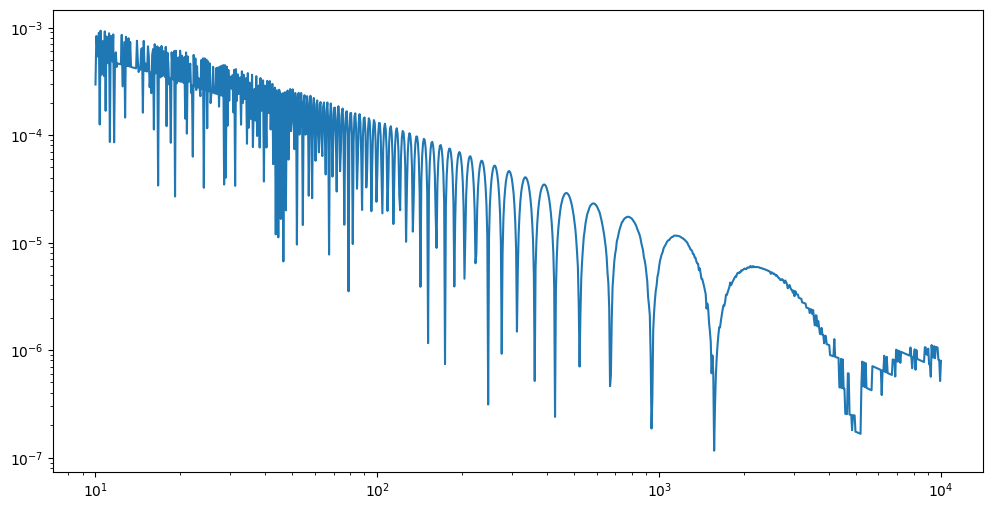

In [29]:
fig, ax = plt.subplots(1,1,figsize=(12, 6))
ax.plot(xs, np.abs(h_freq.flatten()))
ax.set_yscale("log")
ax.set_xscale("log")
fig.show()